In [1]:
# 한글 폰트를 설치합니다.

# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,228 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123621 files and dire

In [1]:
# URL에 있는 파일을 다운로드 받습니다.

import urllib.request

urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/tykimos/tykimos.github.io/master/warehouse/dataset/tarr_train.txt",
    filename="tarr_train.txt",
)

('tarr_train.txt', <http.client.HTTPMessage at 0x7dca53f2e3e0>)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
# 정형데이터를 분석하기 위해서 pandas 패키지를 이용합니다.

import pandas as pd

# Load the train.tsv file
train_file_path = 'tarr_train.txt'

# 데이터프레임 형태로 정보를 가지고 옵니다.
train_data = pd.read_csv(train_file_path, sep='\t')

# Display the first few rows of the dataset
train_data.head()

,id,comment,label
0,1,여기 음식은 언제 와도 실망시키지 않아요. 최고!,1
1,2,여기 라멘 진짜 ㄹㅇ 맛있어요. 국물이 진하고 면도 쫄깃해서 너무 좋았습니다.,1
2,3,"진짜 깔끔하고, 맛도 좋았어요. 추천합니다!",1
3,4,왜 이렇게 유명한지 모르겠음ㅋㅋ ㄹㅈㄷ 맛없음,0
4,5,인생 타르트를 여기서 만났어요❤️ 달지 않고 고소해서 정말 추천합니다!,1


In [3]:
len(train_data['comment'])

300

In [4]:
# Calculate the length of each comment
train_data['comment_length'] = train_data['comment'].apply(len)

# Basic statistics for comment length
comment_length_statistics = train_data['comment_length'].describe()

comment_length_statistics

,comment_length
count,300.000000
mean,31.236667
std,10.682120
min,5.000000
25%,25.000000
50%,30.000000
75%,35.000000
max,92.000000


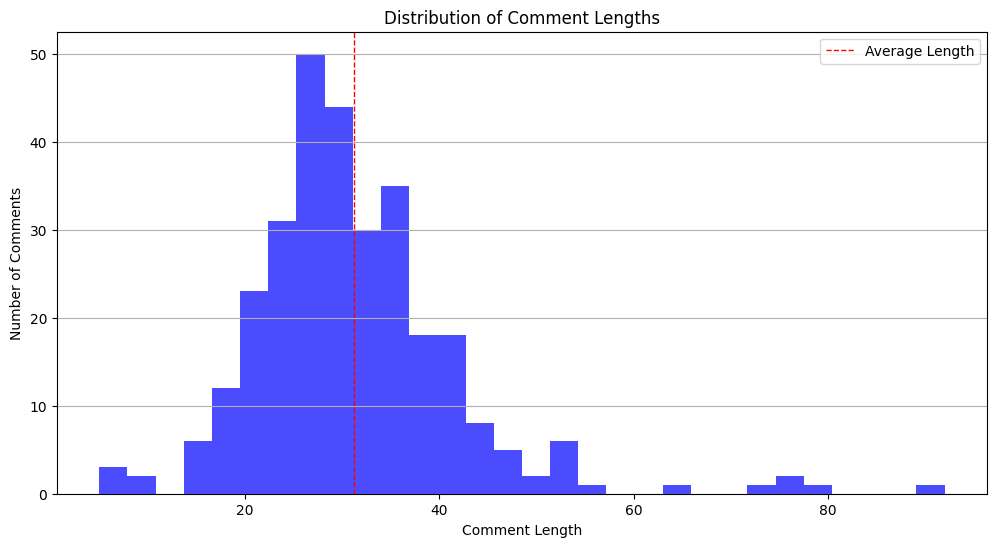

In [5]:
# matplotlib : 데이터를 시각화하는데 많이 사용되는 패키지입니다.

import matplotlib.pyplot as plt

# Plotting the distribution of comment lengths
plt.figure(figsize=(12, 6))
plt.hist(train_data['comment_length'], bins=30, color='blue', alpha=0.7)
plt.axvline(train_data['comment_length'].mean(), color='red', linestyle='dashed', linewidth=1, label='Average Length')
plt.title('Distribution of Comment Lengths')
plt.xlabel('Comment Length')
plt.ylabel('Number of Comments')
plt.legend()
plt.grid(axis='y')
plt.show()


In [6]:
# Basic statistics and distribution of the 'label' column
label_count = train_data['label'].value_counts()
print(label_count)

label_distribution = train_data['label'].value_counts(normalize=True)
print(label_distribution)

label
1    162
0    138
Name: count, dtype: int64
label
1    0.54
0    0.46
Name: proportion, dtype: float64


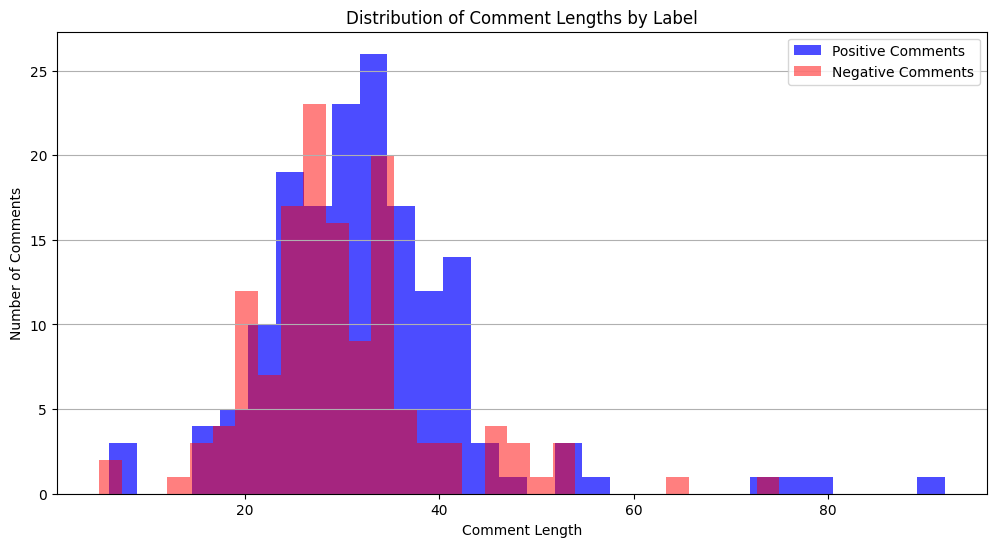

In [7]:
# Plotting distribution of comment lengths by label
plt.figure(figsize=(12, 6))
plt.hist(train_data[train_data['label'] == 1]['comment_length'], bins=30, color='blue', alpha=0.7, label='Positive Comments')
plt.hist(train_data[train_data['label'] == 0]['comment_length'], bins=30, color='red', alpha=0.5, label='Negative Comments')
plt.title('Distribution of Comment Lengths by Label')
plt.xlabel('Comment Length')
plt.ylabel('Number of Comments')
plt.legend()
plt.grid(axis='y')
plt.show()

In [ ]:
from collections import Counter
import re

def get_word_frequencies(texts):
    words = []
    for text in texts:
        # 구두점을 제거한 후 공백을 기준으로 토큰화
        words.extend(re.findall(r'\b\w+\b', text))

    # 단어 빈도수 계산
    return Counter(words)

# re.findall(r'\b\w+\b', text)
# 구두점을 제거한 후 공백을 기준으로 단어를 추출
# \b\w+\b는 단어 경계를 나타내며, 하나 이상의 문자로 구성된 단어를 찾음
# extend(): words 리스트에 추가


# Getting word frequencies for positive and negative comments
positive_comments = train_data[train_data['label'] == 1]['comment']
negative_comments = train_data[train_data['label'] == 0]['comment']

positive_word_freq = get_word_frequencies(positive_comments)
negative_word_freq = get_word_frequencies(negative_comments)

# Getting top 10 frequent words for positive and negative comments
top_positive_words = positive_word_freq.most_common(10)
top_negative_words = negative_word_freq.most_common(10)

top_positive_words, top_negative_words

([('여기', 31),
  ('진짜', 23),
  ('너무', 23),
  ('좋아요', 16),
  ('정말', 14),
  ('이런', 14),
  ('같아요', 11),
  ('맛있어요', 9),
  ('좋았어요', 8),
  ('또', 8)],
 [('너무', 42),
  ('좀', 23),
  ('안', 20),
  ('같아요', 14),
  ('음식이', 13),
  ('것', 13),
  ('올', 11),
  ('여기', 10),
  ('그냥', 10),
  ('왔는데', 9)])

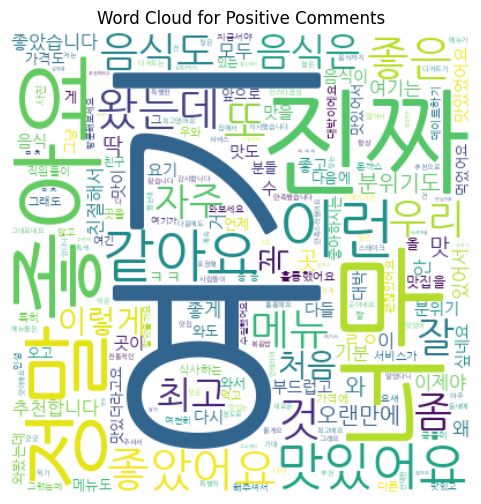

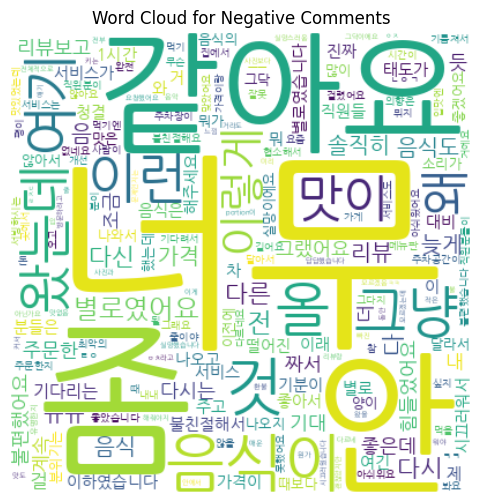

In [ ]:
from wordcloud import WordCloud

# Generate word clouds for positive and negative comments
def generate_wordcloud(word_freq, title):
    wc = WordCloud(width=400, height=400, background_color='white', font_path='NanumGothic.ttf').generate_from_frequencies(word_freq)
    plt.figure(figsize=(6, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Displaying word clouds
generate_wordcloud(positive_word_freq, 'Word Cloud for Positive Comments')
generate_wordcloud(negative_word_freq, 'Word Cloud for Negative Comments')


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

# 텍스트 모음(corpus)에서 상위 n개의 n-그램(ngram)을 반환
def get_top_ngrams(corpus, ngram_range, top_n):
    # 초기화
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    # 각 n-그램의 총 빈도 계산
    # >> 결과물은 n-그램의 빈도를 나타내는 행렬
    sum_words = bag_of_words.sum(axis=0)
    # n-그램과 그 빈도를 리스트로 변환
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top_n]

# ngram_range
# n-그램의 범위를 지정하는 튜플.
# 예를 들어, (1, 2)는 유니그램과 바이그램을 모두 포함
# top_n: 반환할 상위 n개의 n-그램의 수

# vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
# fit(corpus) 메소드를 사용하여 주어진 corpus에 대해 피팅(fitting)을 수행
# >> 이 과정에서 각 n-그램에 대한 어휘 사전을 구축

# vec.vocabulary_는 각 n-그램과 그 인덱스가 담긴 딕셔너리
# >> 각 n-그램과 그 빈도를 튜플 형태로 words_freq 리스트에 저장

# words_freq 리스트를 빈도를 기준으로 내림차순 정렬
# key=lambda x: x[1]는 튜플의 두 번째 요소(빈도수)를 기준으로 정렬

# Getting top 10 bigrams and trigrams for the entire dataset
top_bigrams = get_top_ngrams(train_data['comment'], ngram_range=(2,2), top_n=10)
# ngram_range=(2,2): 바이그램을 추출하기 위해 n-그램 범위를 (2,2)로 설정합니다.
# >> 이는 두 단어로 구성된 n-그램을 의미
top_trigrams = get_top_ngrams(train_data['comment'], ngram_range=(3,3), top_n=10)

top_bigrams, top_trigrams


([('음식이 너무', 8),
  ('너무 친절해서', 5),
  ('친절해서 기분', 5),
  ('기분 좋게', 5),
  ('너무 짜서', 4),
  ('그냥 그랬어요', 4),
  ('분위기도 좋고', 4),
  ('서비스가 너무', 4),
  ('진짜 ㄹㅇ', 3),
  ('리뷰보고 왔는데', 3)],
 [('너무 친절해서 기분', 5),
  ('친절해서 기분 좋게', 5),
  ('음식도 늦게 나오고', 3),
  ('분위기도 좋고 음식도', 3),
  ('직원들이 너무 친절해서', 3),
  ('진짜 ㄹㅇ 맛있어요', 2),
  ('음식이 너무 늦게', 2),
  ('이런 맛집을 지금서야', 2),
  ('왔을 때보다 서비스가', 2),
  ('많이 떨어진 같아요', 2)])

In [9]:
# Getting top 10 bigrams and trigrams for positive and negative comments separately
top_bigrams_positive = get_top_ngrams(train_data[train_data['label'] == 1]['comment'], ngram_range=(2,2), top_n=10)
top_trigrams_positive = get_top_ngrams(train_data[train_data['label'] == 1]['comment'], ngram_range=(3,3), top_n=10)

top_bigrams_negative = get_top_ngrams(train_data[train_data['label'] == 0]['comment'], ngram_range=(2,2), top_n=10)
top_trigrams_negative = get_top_ngrams(train_data[train_data['label'] == 0]['comment'], ngram_range=(3,3), top_n=10)

top_bigrams_positive, top_trigrams_positive, top_bigrams_negative, top_trigrams_negative


([('너무 친절해서', 5),
  ('친절해서 기분', 5),
  ('기분 좋게', 5),
  ('분위기도 좋고', 4),
  ('진짜 ㄹㅇ', 3),
  ('이런 맛집을', 3),
  ('좋아하시는 분들', 3),
  ('처음 와봤는데', 3),
  ('좋고 음식도', 3),
  ('직원들이 너무', 3)],
 [('너무 친절해서 기분', 5),
  ('친절해서 기분 좋게', 5),
  ('분위기도 좋고 음식도', 3),
  ('직원들이 너무 친절해서', 3),
  ('진짜 ㄹㅇ 맛있어요', 2),
  ('이런 맛집을 지금서야', 2),
  ('좋아하시는 분들 와보세요', 2),
  ('여기 인테리어 너무', 2),
  ('친구 추천으로 왔는데', 2),
  ('사진 찍기 좋아요', 2)],
 [('음식이 너무', 7),
  ('너무 짜서', 4),
  ('그냥 그랬어요', 4),
  ('리뷰보고 왔는데', 3),
  ('기대 이하였습니다', 3),
  ('음식도 늦게', 3),
  ('늦게 나오고', 3),
  ('떨어진 같아요', 3),
  ('가격 대비', 3),
  ('너무 시끄러워서', 3)],
 [('음식도 늦게 나오고', 3),
  ('음식이 너무 늦게', 2),
  ('많이 떨어진 같아요', 2),
  ('음식이 너무 짜서', 2),
  ('너무 짜서 먹기', 2),
  ('짜서 먹기 힘들었어요', 2),
  ('오고 싶지 않아요', 2),
  ('리뷰 좋아서 왔는데', 2),
  ('여긴 이렇게 사람이', 2),
  ('여기 리뷰 이래', 2)])

In [11]:
# Specific keywords to analyze their frequency in the reviews
keywords = ['서비스', '가격', '맛', '분위기', '직원']

# Count the occurrence of each keyword in the reviews
keyword_counts = {keyword: train_data['comment'].str.count(keyword).sum() for keyword in keywords}
# keyword_counts는 키워드를 키로, 해당 키워드의 빈도수를 값으로 갖는 딕셔너리

keyword_counts

{'서비스': 19, '가격': 19, '맛': 85, '분위기': 15, '직원': 20}

In [12]:
# Counting the occurrence of each keyword in the reviews for each label
positive_keyword_counts = {keyword: train_data[train_data['label'] == 1]['comment'].str.count(keyword).sum() for keyword in keywords}
negative_keyword_counts = {keyword: train_data[train_data['label'] == 0]['comment'].str.count(keyword).sum() for keyword in keywords}

positive_keyword_counts, negative_keyword_counts

({'서비스': 8, '가격': 8, '맛': 63, '분위기': 13, '직원': 11},
 {'서비스': 11, '가격': 11, '맛': 22, '분위기': 2, '직원': 9})

<ipython-input-13-28a747f56008>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(positive_keyword_counts.keys()), y=list(positive_keyword_counts.values()), ax=ax[0], palette='Blues_d')
<ipython-input-13-28a747f56008>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(negative_keyword_counts.keys()), y=list(negative_keyword_counts.values()), ax=ax[1], palette='Reds_d')
<ipython-input-13-28a747f56008>:20: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  plt.tight_layout()
<ipython-input-13-28a747f56008>:20: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  plt.tight_layout()
<ipython-input-13-28a747f56008>:20: UserWarn

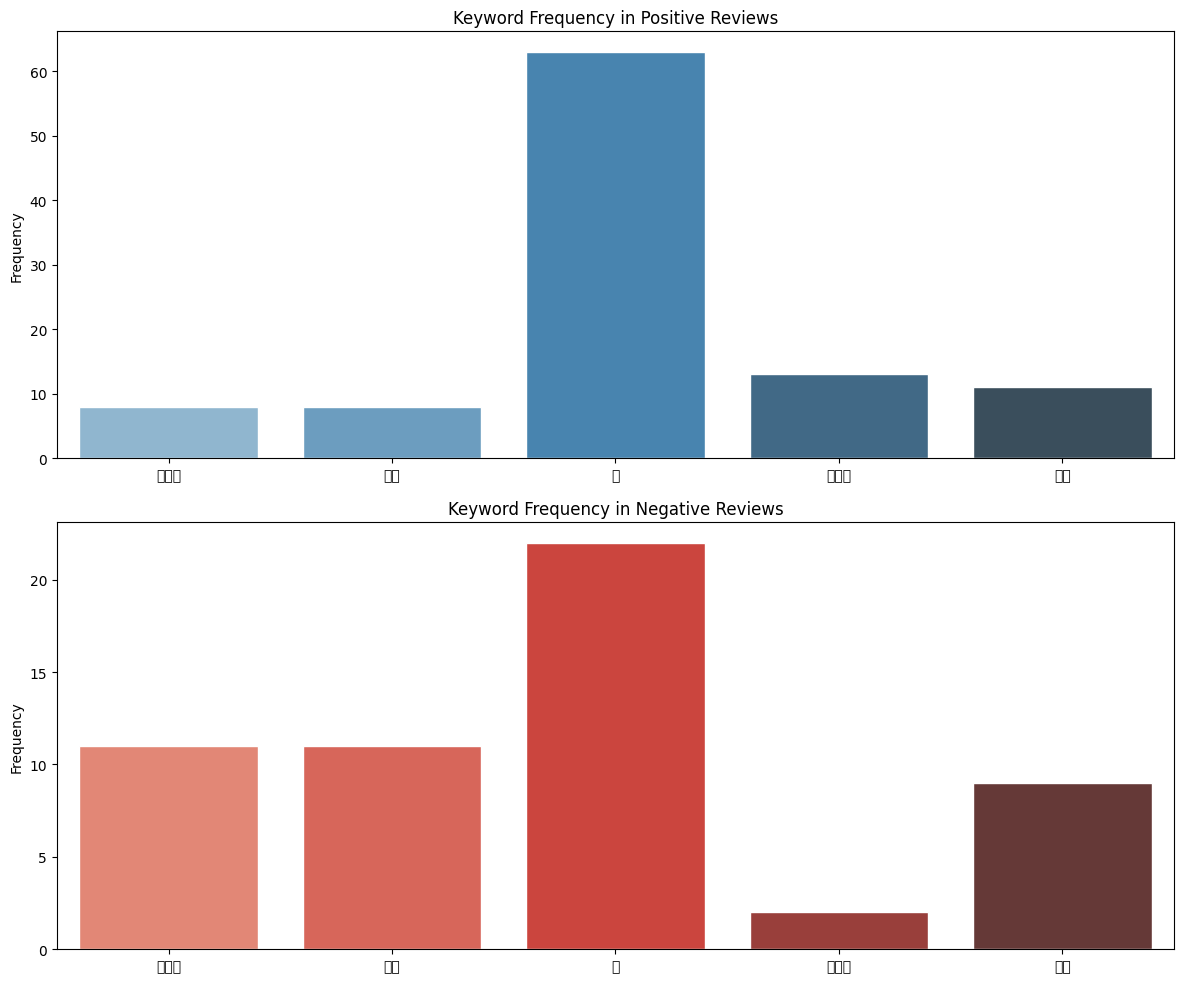

In [13]:
import seaborn as sns

# Visualizing keyword frequency for positive and negative labels

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='white')

# Positive reviews
sns.barplot(x=list(positive_keyword_counts.keys()), y=list(positive_keyword_counts.values()), ax=ax[0], palette='Blues_d')
ax[0].set_title("Keyword Frequency in Positive Reviews")
ax[0].set_ylabel("Frequency")

# Negative reviews
sns.barplot(x=list(negative_keyword_counts.keys()), y=list(negative_keyword_counts.values()), ax=ax[1], palette='Reds_d')
ax[1].set_title("Keyword Frequency in Negative Reviews")
ax[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [16]:
# 텍스트 코퍼스에서 TF-IDF 점수가 가장 높은 상위 top_n개의 단어를 반환 함수 생성
def get_top_tfidf_features(corpus, top_n):
    # TF-IDF 행렬이 생성
    tfidf_vec = TfidfVectorizer().fit(corpus)
    transformed = tfidf_vec.transform(corpus)
    mean_tfidf = transformed.mean(axis=0).tolist()[0]
    # transformed 행렬의 각 열의 평균 TF-IDF 값을 계산
    # .mean(axis=0)은 각 단어의 평균 TF-IDF 값을 계산하며, .tolist()[0]은 이를 리스트 형태로 변환
    sorted_tfidf_index = np.argsort(mean_tfidf)[-top_n:]
    # np.argsort(mean_tfidf)를 사용하여 평균 TF-IDF 값을 정렬하고, [-top_n:]을 통해 상위 top_n개의 단어 인덱스를 추출

    sorted_tfidf_values = [mean_tfidf[i] for i in sorted_tfidf_index]
    #  상위 top_n개의 단어에 해당하는 평균 TF-IDF 값을 담은 리스트
    sorted_tfidf_features = [tfidf_vec.get_feature_names_out()[i] for i in sorted_tfidf_index]
    # 상위 top_n개의 단어 자체를 담은 리스트
    return list(zip(sorted_tfidf_features, sorted_tfidf_values))
    #  상위 top_n개의 단어와 그에 대응하는 TF-IDF 값을 튜플 형태로 결합한 후, 이를 리스트로 변환

# Getting words with top TF-IDF scores after fixing the code
top_tfidf_features = get_top_tfidf_features(train_data['comment'], top_n=10)

top_tfidf_features

[('그냥', 0.013687376648590823),
 ('정말', 0.014749058066344665),
 ('좋아요', 0.014972658609432317),
 ('음식이', 0.016910584461841013),
 ('왔는데', 0.017129225820536793),
 ('이런', 0.019819055177452128),
 ('같아요', 0.020639435969586076),
 ('진짜', 0.024167310616650294),
 ('여기', 0.031209780984430707),
 ('너무', 0.04233601334982539)]

In [ ]:
# Getting top TF-IDF words for positive and negative comments separately
top_tfidf_positive = get_top_tfidf_features(train_data[train_data['label'] == 1]['comment'], top_n=10)
top_tfidf_negative = get_top_tfidf_features(train_data[train_data['label'] == 0]['comment'], top_n=10)

top_tfidf_positive, top_tfidf_negative

([('좋은', 0.015794573515558488),
  ('왔는데', 0.016700611449025134),
  ('같아요', 0.01877905877210045),
  ('맛있어요', 0.020917787452746327),
  ('이런', 0.022451006535394235),
  ('정말', 0.025829318842390096),
  ('좋아요', 0.025855855648262004),
  ('너무', 0.034610136670802),
  ('진짜', 0.037387900220376004),
  ('여기', 0.04163214429506404)],
 [('이렇게', 0.015448051934657724),
  ('별로였어요', 0.017845587667163616),
  ('맛이', 0.02009740100089326),
  ('이런', 0.020486778220176298),
  ('왔는데', 0.020911414159821392),
  ('그냥', 0.02315386264694077),
  ('여기', 0.023508509590134744),
  ('같아요', 0.026674037078069108),
  ('음식이', 0.028554791673134402),
  ('너무', 0.05873634746611193)])

In [ ]:
corpus = [
    "I love machine learning and artificial intelligence",
    "Machine learning is fascinating",
    "I love learning new things about AI and ML"
]


In [ ]:
get_top_tfidf_features(corpus, 5)

[('fascinating', 0.194827633673355),
 ('and', 0.22483482610234098),
 ('love', 0.22483482610234098),
 ('machine', 0.2736150192293466),
 ('learning', 0.2896726383487431)]

추가 학습
- argsort()

In [ ]:
import numpy as np

# 예시 배열
arr = np.array([10, 3, 5, 2])

# 배열을 정렬했을 때의 인덱스 반환
sorted_indices = np.argsort(arr)
print(sorted_indices)

# 배열의 가장 작은 값인 2는 원래 인덱스 3에 있었음
# 가장 큰 값인 10은 원래 인덱스 0에 있었음

[3 1 2 0]


In [ ]:
# -top_n
# -top_n은 배열의 끝에서부터 top_n개의 요소를 선택하기 위해 사용됩니다.
# 예를 들어, -3은 배열의 마지막 3개의 요소를 선택하는 것을 의미

# [3 1 2 0]
# sorted_indices 배열의 마지막 2개의 인덱스 선택
top_2_indices = sorted_indices[-2:]
print(top_2_indices)

[2 0]


In [ ]:
import numpy as np

# 예시 TF-IDF 평균 값 배열
mean_tfidf = np.array([0.1, 0.4, 0.3, 0.2, 0.5])

# TF-IDF 값들을 정렬했을 때의 인덱스 반환
sorted_indices = np.argsort(mean_tfidf)
print("정렬된 인덱스:", sorted_indices)

# 가장 큰 3개의 TF-IDF 값을 갖는 인덱스 선택
top_n = 3
top_n_indices = sorted_indices[-top_n:]
print("상위 3개의 인덱스:", top_n_indices)

# 상위 3개의 TF-IDF 값과 해당 단어
top_n_values = [mean_tfidf[i] for i in top_n_indices]
print("상위 3개의 TF-IDF 값:", top_n_values)

정렬된 인덱스: [0 3 2 1 4]
상위 3개의 인덱스: [2 1 4]
상위 3개의 TF-IDF 값: [0.3, 0.4, 0.5]
